# The Ifood test case
---
https://github.com/ifood/ifood-data-business-analyst-test \
This notebook goes into detail on how I approached this test case 

# First steps, performing EDA
---

Lets begin by importing and loading what we will need

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
initial_df = pd.read_csv('./ifood-data-business-analyst-test-master/ml_project1_data.csv', index_col=0)

Now let's take a peek on the dataframe we have

In [3]:
display(initial_df.head())
display(initial_df.sample(5))

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5313,1971,Master,Married,38196.0,1,1,2014-04-18,20,30,0,...,5,0,0,0,0,0,0,3,11,0
7873,1973,PhD,Together,63516.0,1,1,2013-07-06,30,141,11,...,5,0,0,0,0,0,0,3,11,0
8605,1964,PhD,Together,46910.0,1,1,2014-03-23,36,48,0,...,6,0,0,0,0,0,0,3,11,0
999,1991,Graduation,Single,86037.0,0,0,2013-01-02,95,490,44,...,3,0,1,1,0,0,0,3,11,1
3690,1986,Master,Married,80141.0,0,0,2013-01-11,20,1184,102,...,6,0,0,1,0,0,0,3,11,1


Then lets see the types of data we are working with

In [4]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

Looks like most of the data that should be int is already typed as int, that's good, but now lets take a close at the 2 columns not described on the pdf

Z_CostContact always has 3 as the value, and Z_Revenue always has 11, on a hunch those are the cost of the campaing per user and the potential revenue per user but lets check

In [5]:
display(initial_df.Z_CostContact.sum())
display(initial_df[initial_df.Response == 1].Z_Revenue.sum())

6720

3674

On target, the values match the pdf info, but we wont need them for now, so for clarity and to start preprocessing already lets drop them

In [6]:
df = initial_df.drop(['Z_CostContact', 'Z_Revenue'],1)

Now lets start fixing the types on the non numeric columns

First the date one

In [7]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)

Now let's check the str ones looking for categories

In [8]:
display(df.Education.value_counts())
df.Marital_Status.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

Well both are delimited and categorical, we need to change the type

But before that let's fix the bogus user inputs that were not validated on the Marital_Status column, as there is only 7 of then we can check ourselves

In [9]:
invalid_status = ['Alone','YOLO','Absurd']
display(df.loc[df.Marital_Status.isin(invalid_status)])

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,...,1,6,8,0,0,0,0,0,0,0
7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,...,1,2,5,1,0,0,0,0,0,1
92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,...,0,4,6,0,0,0,0,0,0,0
7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,...,10,7,1,0,0,1,1,0,0,1
4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,...,5,6,2,0,0,0,0,0,0,0
492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,...,1,6,8,0,0,0,0,0,0,0
11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,...,1,6,8,0,0,0,0,0,0,1


alone can be considered single \
Absurd can refer to the idea that asking the question is absurd so the Marital_Status cant be inferred \
now, the YOLO one looks suspicious, is it the same user with 2 IDs?

In [10]:
df.loc[11133] == df.loc[492]

Year_Birth              True
Education               True
Marital_Status          True
Income                  True
Kidhome                 True
Teenhome                True
Dt_Customer             True
Recency                 True
MntWines                True
MntFruits               True
MntMeatProducts         True
MntFishProducts         True
MntSweetProducts        True
MntGoldProds            True
NumDealsPurchases       True
NumWebPurchases         True
NumCatalogPurchases     True
NumStorePurchases       True
NumWebVisitsMonth       True
AcceptedCmp3            True
AcceptedCmp4            True
AcceptedCmp5            True
AcceptedCmp1            True
AcceptedCmp2            True
Complain                True
Response               False
dtype: bool

Well they are identical, but one accepted the Cmp6 and the other did not, to rly understand this we need more data, but for new lets just keep then as Not_Declared status

In [11]:
df.loc[df.Marital_Status == 'Alone', 'Marital_Status'] = 'Single'
df.loc[df.Marital_Status.isin(['YOLO', 'Absurd']), 'Marital_Status'] = 'Not_Declared'
df.Marital_Status.value_counts()

Married         864
Together        580
Single          483
Divorced        232
Widow            77
Not_Declared      4
Name: Marital_Status, dtype: int64

Now to set the right types, remembering that the Education is an ordered category, as a PhD is superior than a Master's degree, Master's deegre is superior to a bachelor's Graduation...

as it was not especified and I can't rly find those labels online, this is the pairing I made for the US education:

1. Basic: elementary/primary education
2. 2n Cycle: high school/secondary education
3. Graduation: Bachelor's degree
4. Master: Master's degree
5. PhD: PhD/Doctorate

In [12]:
df['Education'] = df.Education.astype('category')
df.Education.cat.reorder_categories(['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ordered=True, inplace=True)
df['Marital_Status'] = df.Marital_Status.astype('category')

Now lets sanity check the numeric columns

In [13]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Only the Income column looks suspicious, and as it's the only one with NaN values probably it was user input, this max value looks like a wrong input, let's take a look

In [14]:
df[df.Income > 150000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,...,22,0,0,0,0,0,0,0,0,0
1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,...,0,1,1,0,0,0,0,0,0,0
5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,...,0,0,0,0,0,0,0,0,0,0
1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,...,28,1,0,0,0,0,0,0,0,0
5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,...,0,1,1,0,0,0,0,0,0,0
4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,...,28,0,1,0,0,0,0,0,0,0
11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,...,0,0,0,0,0,0,0,0,0,0
9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,...,1,3,6,0,0,0,0,0,0,0


Well for sure it was a wrong input, lets fix this so we already treat this fake outlier

In [15]:
df.loc[9432, 'Income'] = np.NaN

Now we can begin finding correlations with our target variable

Let's plot the correlation matrix:

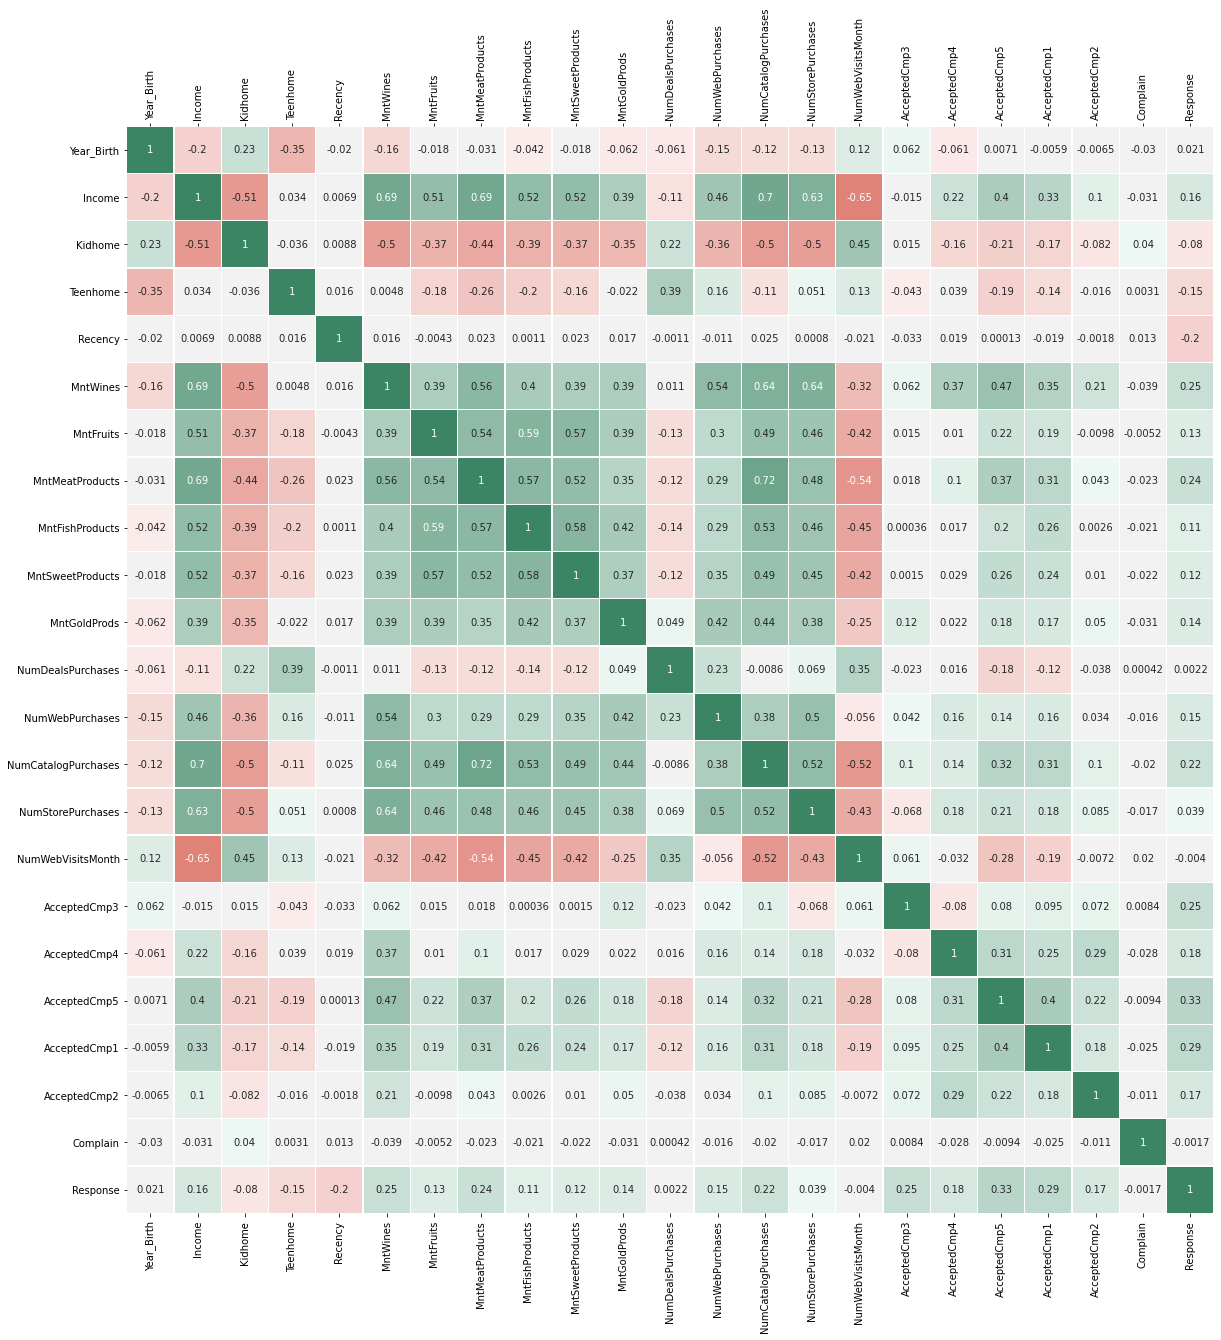

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(15, 150, center='light', n=200), square=True, yticklabels=1, annot=True, cbar=False, linewidths=.3, ax=ax)
ax.tick_params(top=True,labeltop=True)
plt.xticks(rotation='vertical')
plt.show()

Only some weak linear correlations, lets see the categorical ones now:

In [17]:
df.groupby('Education').Response.mean()

Education
Basic         0.037037
2n Cycle      0.108374
Graduation    0.134871
Master        0.154054
PhD           0.207819
Name: Response, dtype: float64

In [18]:
df.groupby('Marital_Status').Response.mean()

Marital_Status
Divorced        0.206897
Married         0.113426
Not_Declared    0.500000
Single          0.221532
Together        0.103448
Widow           0.246753
Name: Response, dtype: float64

The categorical gives us some good insights on who this campaing was targeting, lets take a closer look on the numeric ones now, beggining with Income:

In [19]:
print('<= 25%: ' + str(df[df.Income <= df.Income.describe()['25%']].Response.mean()))
print('25% -- 50%: ' + str(df[(df.Income >= df.Income.describe()['25%']) & (df.Income <= df.Income.describe()['50%'])].Response.mean()))
print('50% -- 75%: ' + str(df[(df.Income >= df.Income.describe()['50%']) & (df.Income <= df.Income.describe()['75%'])].Response.mean()))
print('> 75%: ' + str(df[df.Income > df.Income.describe()['75%']].Response.mean()))

<= 25%: 0.10469314079422383
25% -- 50%: 0.12454873646209386
50% -- 75%: 0.10270270270270271
> 75%: 0.2694394213381555


insights gathered:

- the campaign 6 was something loosely related to wine and meat focusing the high income users
- as I dont have the information if all 2.240 participed on the others campaings, I cant say for sure that c6 wanted to use the same market share of campaings 5 and 1, but i can say that they are at least loosely related
- at higher education levels the acceptance rate of Cmp6 is considerably higher but this can be inferred as an effect of the high positive correlation on income and education
- the campain was considerably better accepted better by users who are not on a relationship

In [20]:
df.to_csv('./processed_data/df.csv')

---

# Costumer segmentation

Now lets try a quick first fit on a simple logistic regression classifier to understand better what we need to predict

First the check to see if we need to impute NaNs or deal with duplicates on this first test

In [21]:
display(df.shape[0])
display(df.dropna().drop_duplicates().shape[0])
ffdf = df.dropna().drop_duplicates().copy()

2240

2032

~10% of data loss, not that good, but not that bad too, lets start with handling the categorical columns for the model

In [22]:
ffdf['Education'] = ffdf.Education.cat.codes

In [23]:
ffdf = pd.get_dummies(ffdf)

In [24]:
ffdf['Dt_Customer'] = (pd.to_datetime('2020-11-07') - ffdf.Dt_Customer).dt.days

In [25]:
from sklearn.preprocessing import scale

In [26]:
X = ffdf
X = scale(X)

In [27]:
from sklearn.cluster import KMeans

In [28]:
kmeans5 = KMeans(n_clusters = 5, random_state=345)

In [29]:
kmeans5.fit(X)

KMeans(n_clusters=5, random_state=345)

In [30]:
ffdf['Kmeans_5'] = kmeans5.labels_
ffdf['Kmeans_5'] = ffdf.Kmeans_5.astype('category')

In [31]:
ffdf.Education.corr(ffdf.Kmeans_5)

0.1196566368127185

Nice it found another 5 split on the rows that isn't correlated with education

In [32]:
ffdf.Kmeans_5.value_counts()

0    921
3    543
2    395
1    153
4     20
Name: Kmeans_5, dtype: int64

label 4 is only 20 rows? that one we can quickly look into it

In [33]:
with pd.option_context('display.max_columns', None):
    display(ffdf[ffdf.Kmeans_5 == 4])

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Not_Declared,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kmeans_5
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10401,1976,1,26326.0,0,0,2621,12,1,0,5,0,3,9,1,0,0,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,4
3120,1981,2,38547.0,1,0,2628,49,6,1,10,0,1,4,1,1,0,2,8,0,0,0,0,0,1,0,0,0,0,0,1,0,4
7829,1900,1,36640.0,1,0,2599,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,1,0,0,0,0,0,4
5726,1983,3,31788.0,1,0,2424,15,16,7,23,0,8,6,3,3,0,4,5,0,0,0,0,0,1,0,0,0,0,1,0,0,4
6201,1978,2,38643.0,1,1,2535,45,22,2,14,0,1,10,2,2,0,3,7,0,0,0,0,0,1,0,0,0,0,1,0,0,4
6142,1943,3,65073.0,0,0,2636,65,629,17,177,69,0,8,1,5,3,5,2,0,0,0,0,0,1,0,0,1,0,0,0,0,4
3710,1984,4,39684.0,1,0,2948,41,19,0,35,6,4,17,2,2,1,2,7,0,0,0,0,0,1,1,0,0,0,1,0,0,4
10995,1988,1,15716.0,1,0,2917,8,16,5,30,8,7,26,3,3,0,4,8,0,0,0,0,0,1,0,0,1,0,0,0,0,4
6730,1954,2,38998.0,1,1,2926,92,34,1,14,0,0,5,3,2,0,3,8,0,0,0,0,0,1,0,0,1,0,0,0,0,4


In [34]:
ffdf.Complain.corr(ffdf.Kmeans_5 == 4)

1.0

well, the 4 is just the people who complained, not that much information gained there, but now lets look at all the correlations on the groups

In [35]:
ffdf_5 = pd.get_dummies(ffdf)
correlations = pd.DataFrame([{column:ffdf_5[column].corr(ffdf_5['Kmeans_5_' + str(i)]) for column in ffdf_5.columns.tolist()} for i in range(5)])
with pd.option_context('display.max_columns', None):
    display(correlations)

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Not_Declared,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kmeans_5_0,Kmeans_5_1,Kmeans_5_2,Kmeans_5_3,Kmeans_5_4
0,0.239104,-0.113334,-0.721504,0.611738,-0.111632,-0.163280,0.011692,-0.712163,-0.488054,-0.578907,-0.501553,-0.482952,-0.500966,-0.128617,-0.650527,-0.656049,-0.726897,0.423361,0.002109,-0.235572,-0.254259,-0.236958,-0.094860,-0.090777,-0.146469,-0.025343,0.007792,-0.040436,0.043449,-0.001175,-0.063568,1.000000,-0.25981,-0.447247,-0.549826,-0.090777
1,0.014215,0.040751,0.395931,-0.211271,-0.190782,0.003419,0.002514,0.482201,0.214867,0.376293,0.199017,0.261130,0.181503,-0.188496,0.137739,0.324453,0.210171,-0.267040,0.068482,0.346594,0.957036,0.444809,0.299402,-0.028450,0.333723,-0.019749,0.021693,0.029405,-0.023550,0.001604,0.017685,-0.259810,1.00000,-0.140170,-0.172320,-0.028450
2,-0.044447,-0.033735,0.482487,-0.363858,-0.266466,0.013922,0.000866,0.273257,0.573514,0.587955,0.622162,0.532850,0.308628,-0.221091,0.182361,0.532212,0.395921,-0.489514,-0.030122,-0.089625,-0.137176,0.101299,-0.055924,-0.048975,0.028805,-0.012057,-0.033637,0.006241,0.046079,-0.010655,0.029953,-0.447247,-0.14017,1.000000,-0.296638,-0.048975
3,-0.231878,0.143620,0.150803,-0.245430,0.478002,0.162511,-0.017134,0.277811,-0.091428,-0.093977,-0.106601,-0.084231,0.185889,0.455223,0.489835,0.072571,0.341328,0.117285,-0.018449,0.144879,-0.160052,-0.083372,-0.019274,-0.060208,-0.059766,0.051524,0.010105,0.023362,-0.080521,0.010020,0.038382,-0.549826,-0.17232,-0.296638,1.000000,-0.060208
4,-0.026150,-0.045960,-0.030067,0.038629,-0.001617,0.029961,0.007655,-0.038347,-0.002401,-0.022203,-0.018963,-0.021047,-0.029357,-0.001863,-0.014477,-0.017740,-0.013374,0.015457,0.009765,-0.028651,-0.008599,-0.026385,-0.011351,1.000000,-0.000980,-0.002038,-0.007734,-0.004428,0.020068,-0.000565,-0.018832,-0.090777,-0.02845,-0.048975,-0.060208,1.000000


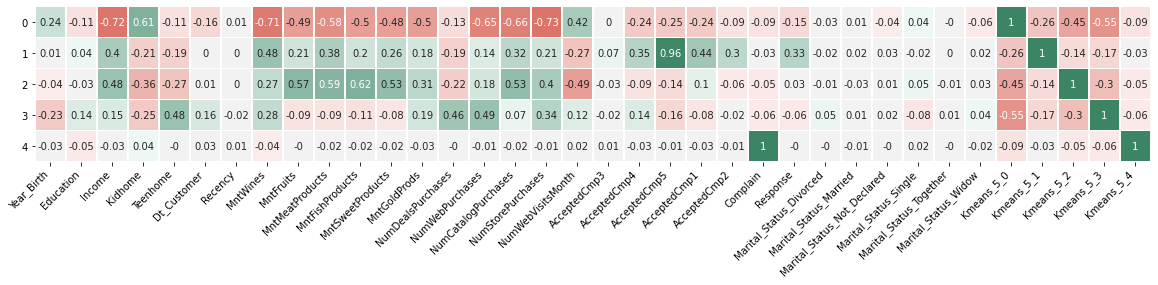

In [36]:
corr_fig, corr_ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations.round(2), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(15, 150, center='light', n=200), square=True, yticklabels=1, annot=True, cbar=False, linewidths=.3, ax=corr_ax)
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation='horizontal')
plt.show()

quick insights:

- the group 1 is heavily defined by the ones who accepted campaing 5, and as we can see that it is correlated with high incomes and amount of meat and wines bought and confirm what the predictive model gave us
- the group 0 is heavily defined by the low income, low purchases users.
- the group 2 is defined by the medium-high income and consumer of high end products users
- the group 3 is the most interesting one, it is defined by the coupon hunters/households with teens users

Now we can quickly try reducing to 3 to see if the Complain and Cmp5 skew the results again

In [37]:
kmeans3 = KMeans(n_clusters = 3, random_state=345)

In [38]:
kmeans3.fit(X)

KMeans(n_clusters=3, random_state=345)

In [39]:
ffdf['Kmeans_3'] = kmeans3.labels_
ffdf['Kmeans_3'] = ffdf.Kmeans_3.astype('category')

In [40]:
ffdf.Kmeans_3.value_counts()

1    939
0    597
2    496
Name: Kmeans_3, dtype: int64

In [41]:
ffdf_3 = pd.get_dummies(ffdf.drop('Kmeans_5', axis=1))
correlations = pd.DataFrame([{column:ffdf_3[column].corr(ffdf_3['Kmeans_3_' + str(i)]) for column in ffdf_3.columns.tolist()} for i in range(3)])
with pd.option_context('display.max_columns', None):
    display(correlations)

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Not_Declared,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kmeans_3_0,Kmeans_3_1,Kmeans_3_2
0,-0.239854,0.135167,0.182509,-0.278542,0.471338,0.165034,-0.017253,0.299702,-0.038538,-0.080121,-0.054264,-0.034021,0.208916,0.433775,0.531339,0.099434,0.388849,0.088081,-0.017975,0.160613,-0.142586,-0.096434,0.003472,0.001357,-0.067925,0.054470,0.014382,0.020105,-0.087973,0.008160,0.044039,1.000000,-0.597839,-0.366527
1,0.232459,-0.117432,-0.731112,0.625621,-0.106328,-0.158505,0.015600,-0.723590,-0.495892,-0.588920,-0.514099,-0.491544,-0.507841,-0.122833,-0.659500,-0.666519,-0.738941,0.430494,0.004599,-0.240322,-0.258837,-0.241302,-0.096740,0.027576,-0.145601,-0.025028,0.007820,-0.041164,0.043608,-0.000138,-0.066828,-0.597839,1.000000,-0.526706
2,-0.015461,-0.007034,0.655041,-0.430765,-0.376403,0.008966,0.000188,0.522035,0.616430,0.768499,0.654238,0.606594,0.367895,-0.317415,0.202017,0.668163,0.445320,-0.593062,0.013724,0.108616,0.451623,0.382331,0.108600,-0.033445,0.241023,-0.028712,-0.024328,0.026458,0.042674,-0.008493,0.030865,-0.366527,-0.526706,1.000000


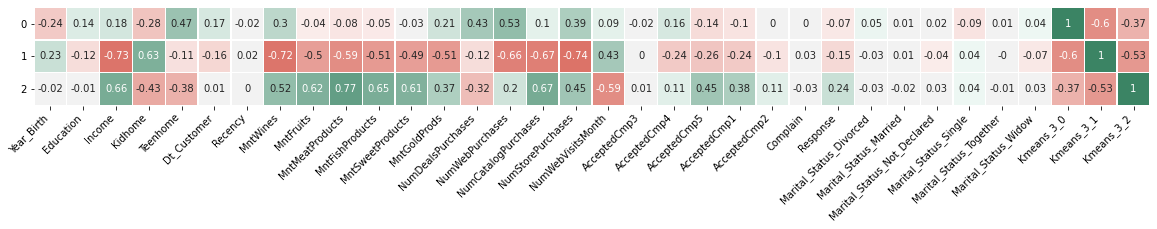

In [42]:
corr_fig, corr_ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations.round(2), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(15, 150, center='light', n=200), square=True, yticklabels=1, annot=True, cbar=False, linewidths=.3, ax=corr_ax)
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation='horizontal')
plt.show()

That is a hit!

the 3 groups are the same defined before {3:0, 0:1, 2:2} and the 2 smaller ones where absorved by the bigger ones and where just subgroups delimited by a single feature

in the end this is an acceptable segmentation for the time put into it

Now we can try to represent this 3 groups graphicaly to get a better notion

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=0.95, svd_solver='full')
princ_comp = pca.fit_transform(X)

In [45]:
princ_comp.shape[1]

25

In [46]:
pca = PCA(n_components=0.85, svd_solver='full')
princ_comp = pca.fit_transform(X)

In [47]:
princ_comp.shape[1]

18

no deal with pca, the number of components is too high to make the pca worth, but we can still make the diferentiation clear without it.

In [48]:
total_purchases = ffdf.NumWebPurchases + ffdf.NumCatalogPurchases + ffdf.NumStorePurchases

In [49]:
from matplotlib.lines import Line2D

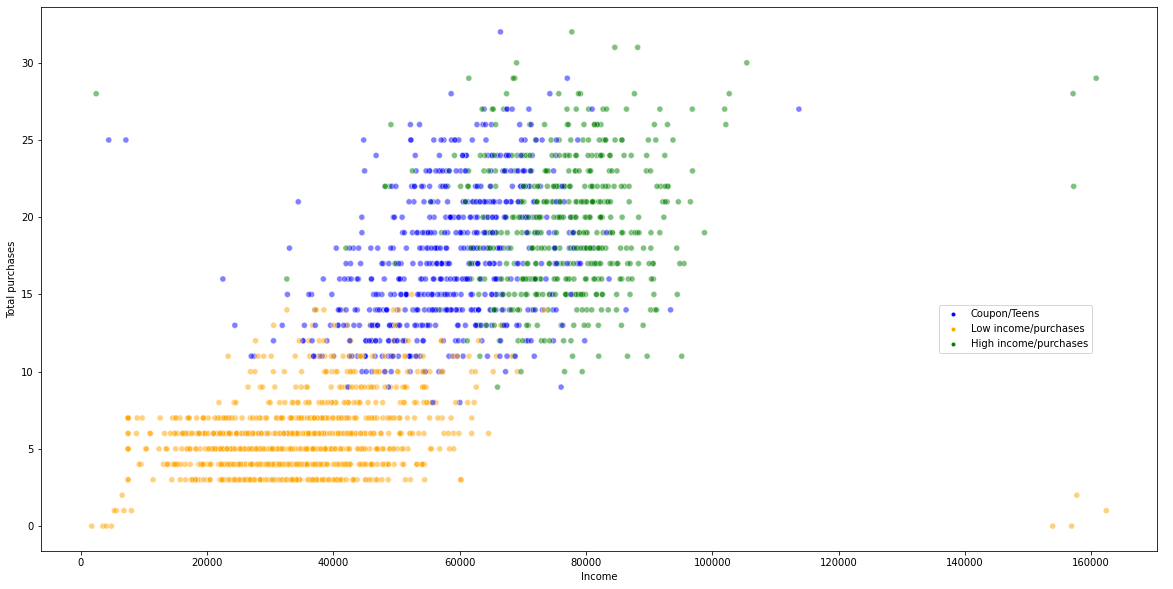

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_palette(sns.color_palette(['b','orange','green']))
sns.scatterplot(x=ffdf.Income, y=total_purchases, hue=ffdf.Kmeans_3, alpha=0.5,legend=False, ax=ax)
ax.set_ylabel('Total purchases')
custom_legends = [Line2D([], [], marker='.', color='b', linestyle='None'), 
                  Line2D([], [], marker='.', color='orange', linestyle='None'),
                  Line2D([], [], marker='.', color='green', linestyle='None')]
fig.legend(custom_legends,['Coupon/Teens', 'Low income/purchases', 'High income/purchases'], loc=(0.8,0.4));

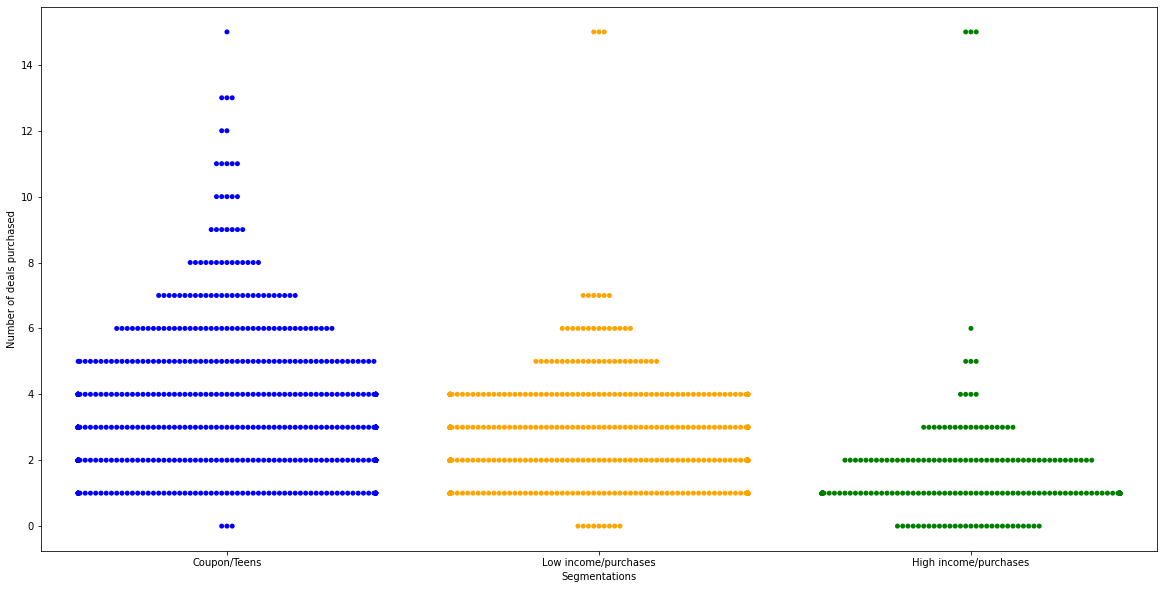

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_palette(sns.color_palette(['b','orange','green']))
sns.swarmplot(x=ffdf.Kmeans_3, y=ffdf.NumDealsPurchases, ax=ax)
ax.set_ylabel('Number of deals purchased')
ax.set_xlabel('Segmentations')
ax.set_xticklabels(['Coupon/Teens', 'Low income/purchases', 'High income/purchases']);

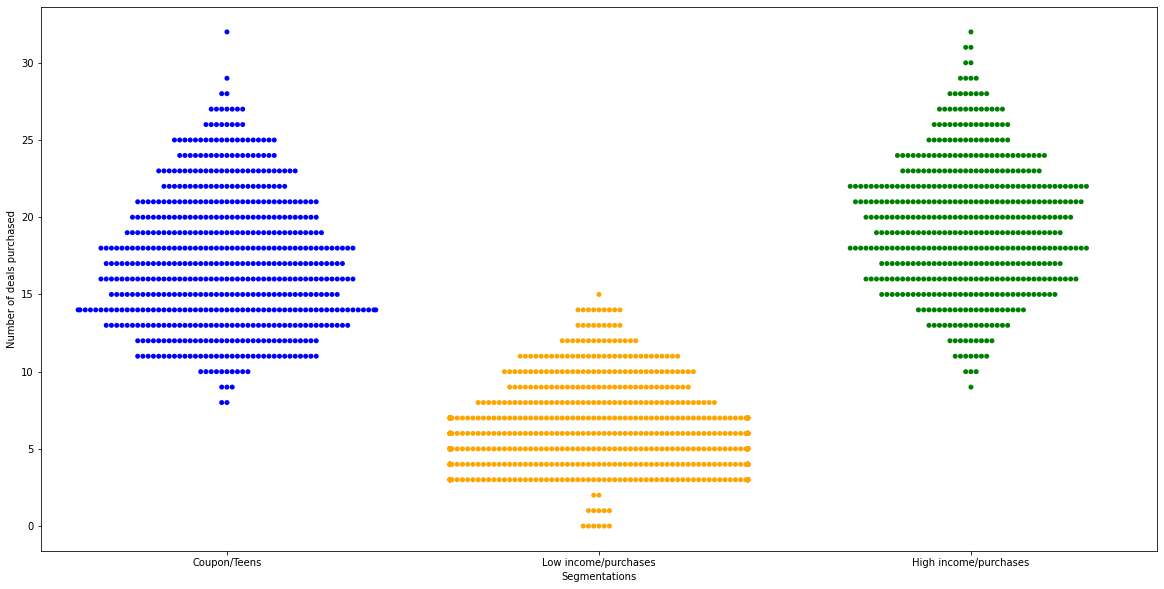

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_palette(sns.color_palette(['b','orange','green']))
sns.swarmplot(x=ffdf.Kmeans_3, y=total_purchases, ax=ax)
ax.set_ylabel('Number of deals purchased')
ax.set_xlabel('Segmentations')
ax.set_xticklabels(['Coupon/Teens', 'Low income/purchases', 'High income/purchases']);

The costumer segmentation defined 3 distincts groups, but we still need to see a higher than 5 grouping to check if those 3 are easily disrupted after the campaing 5 and complain features

In [54]:
kmeans7 = KMeans(n_clusters = 7, random_state=345)

In [55]:
kmeans7.fit(X)

KMeans(n_clusters=7, random_state=345)

In [56]:
ffdf['Kmeans_7'] = kmeans7.labels_
ffdf['Kmeans_7'] = ffdf.Kmeans_7.astype('category')

In [57]:
ffdf.Kmeans_7.value_counts()

1    613
0    436
6    385
3    280
2    162
5    152
4      4
Name: Kmeans_7, dtype: int64

In [60]:
ffdf_7 = pd.get_dummies(ffdf.drop(['Kmeans_5','Kmeans_3'], axis=1))
correlations = pd.DataFrame([{column:ffdf_7[column].corr(ffdf_7['Kmeans_7_' + str(i)]) for column in ffdf_7.columns.tolist()} for i in range(7)])
with pd.option_context('display.max_columns', None):
    display(correlations)

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Not_Declared,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kmeans_7_0,Kmeans_7_1,Kmeans_7_2,Kmeans_7_3,Kmeans_7_4,Kmeans_7_5,Kmeans_7_6
0,-0.195918,0.124632,0.148524,-0.227995,0.419633,0.165565,-0.019352,0.290583,-0.058081,-0.063168,-0.075803,-0.046622,0.190611,0.407598,0.465287,0.096990,0.344583,0.097642,-0.020109,0.134319,-0.136704,-0.070463,0.004493,-0.003538,-0.043045,-0.145254,0.117901,-0.023213,-0.019263,-0.038834,0.072174,1.000000,-0.343531,-0.153838,-0.208948,-0.023213,-0.148617,-0.252703
1,0.216075,-0.088909,-0.525541,0.429867,-0.101972,-0.126871,-0.016123,-0.511160,-0.342174,-0.413649,-0.356800,-0.340923,-0.348142,-0.080982,-0.455555,-0.467669,-0.510764,0.304498,0.022269,-0.176756,-0.183545,-0.169606,-0.074827,0.021359,-0.086613,-0.226677,0.293291,-0.029190,0.233995,-0.381961,-0.012447,-0.343531,1.000000,-0.193453,-0.262755,-0.029190,-0.186888,-0.317777
2,-0.075574,0.024941,-0.084015,0.055370,0.088392,-0.018439,0.008100,-0.078335,-0.104314,-0.123801,-0.116691,-0.122234,-0.087622,0.046556,-0.043662,-0.103888,-0.084751,0.093749,-0.007193,-0.009290,-0.082194,-0.070547,-0.033509,0.007463,-0.039683,0.853430,-0.234255,-0.013072,-0.154960,-0.171047,-0.055595,-0.153838,-0.193453,1.000000,-0.117665,-0.013072,-0.083691,-0.142305
3,0.036975,-0.039627,-0.264611,0.229508,0.009203,-0.039886,0.035572,-0.284876,-0.205526,-0.237552,-0.200756,-0.203498,-0.184043,-0.025928,-0.226334,-0.266504,-0.270952,0.162657,-0.015281,-0.071850,-0.111639,-0.100025,-0.032809,-0.010932,-0.091057,-0.137874,-0.318174,-0.017754,-0.210473,0.687911,-0.075511,-0.208948,-0.262755,-0.117665,1.000000,-0.017754,-0.113672,-0.193284
4,0.019334,0.034671,0.017147,-0.036674,-0.000720,0.030436,-0.031999,0.004382,0.019473,0.002613,0.054523,-0.011141,0.067941,0.026732,0.018516,0.023844,0.006384,-0.010412,-0.012583,-0.012762,0.030457,0.033139,-0.005056,-0.004428,0.042680,-0.015317,-0.035347,1.000000,-0.023382,-0.025809,-0.008389,-0.023213,-0.029190,-0.013072,-0.017754,1.000000,-0.012628,-0.021472
5,0.013600,0.039878,0.395393,-0.210364,-0.193041,0.002205,0.001222,0.479527,0.212661,0.381593,0.193831,0.264675,0.174453,-0.187773,0.140258,0.325224,0.214723,-0.264531,0.076351,0.341130,0.960446,0.439082,0.283874,-0.009400,0.335526,-0.019164,0.019408,-0.012628,-0.018099,0.002696,0.018091,-0.148617,-0.186888,-0.083691,-0.113672,-0.012628,1.000000,-0.137476
6,-0.039439,-0.039505,0.483387,-0.359406,-0.259681,0.018061,0.005068,0.276589,0.569522,0.588704,0.618253,0.535198,0.305723,-0.218482,0.179145,0.531340,0.389282,-0.488032,-0.036436,-0.091627,-0.135016,0.110695,-0.055043,-0.010041,0.023986,-0.036365,-0.034282,-0.021472,0.053143,0.002320,0.032619,-0.252703,-0.317777,-0.142305,-0.193284,-0.021472,-0.137476,1.000000


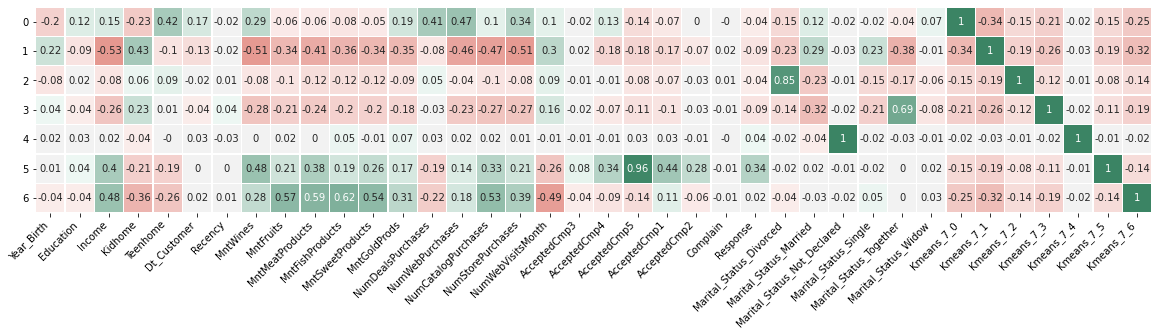

In [61]:
corr_fig, corr_ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations.round(2), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(15, 150, center='light', n=200), square=True, yticklabels=1, annot=True, cbar=False, linewidths=.3, ax=corr_ax)
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation='horizontal')
plt.show()

As we can see the 3 delimited groups still stand (0,1,6), but campaing 5 subgroup is back and 3 new groups are heavily delimited by the Marital_Status feature, so 3 looks like the best number of segments.

---